In [1]:
import numpy as np
import math
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg
from matplotlib import pyplot as plt


In [2]:
fileName = "D:/testing/file/housing_scale.txt";


# 读取houses数据
# 返回 x : scipy.sparse matrix of shape (n_samples, n_features)
# 返回 y :  ndarray of shape (n_samples,), or, in the multilabel a list of
def load_dataset(file):
    data = load_svmlight_file(file)
    return data[0], data[1]


X, y = load_dataset(fileName)
print(X.shape, y.shape)
print(X[0])

(506, 13) (506,)
  (0, 0)	-1.0
  (0, 1)	-0.64
  (0, 2)	-0.86437
  (0, 3)	-1.0
  (0, 4)	-0.37037
  (0, 5)	0.155011
  (0, 6)	0.283213
  (0, 7)	-0.461594
  (0, 8)	-1.0
  (0, 9)	-0.583969
  (0, 10)	-0.425532
  (0, 11)	1.0
  (0, 12)	-0.82064


In [3]:
# 切分为训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train))

(339, 13) (167, 13) (339,) (167,)
<class 'scipy.sparse.csr.csr_matrix'>


In [4]:


# 线性模型参数初始化，使用高斯分布随机值
# n : 特征个数
def random_param(n):
    return np.random.normal(size=(n))


# h ：预测值，数组
# y ：实际值，数组
def get_loss_val(h, y):
    losses = delta_square(h, y)
    sum = 0.0
    for i in losses:
        sum += i
    sum = sum / y.shape
    return sum[0]
    

# loss函数的分子
def delta_square(h, y):
    return (h-y)**2
    

params = random_param(13)
# 计算每一个训练集的 h(x)
hs = X_train.dot(params)
# print(hs.shape)
# print(y_train.shape)
loss = get_loss_val(hs, y_train)
print(loss)

622.057685071


In [5]:


# x : 训练集
# y ：实际值
# linalg函数：矩阵的逆
# T 直接进行矩阵转置
def normal_equation(x, y):
     return linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    
# 使用闭式解直接计算出合理的参数
w = normal_equation(X_train, y_train)
print(w)

# 在训练集上计算并打印loss_train 
train_hs = X_train.dot(w)
loss_train = get_loss_val(train_hs, y_train)
print(loss_train)

# 在测试集上计算并打印lose_val
test_hs = X_test.dot(w)
loss_val = get_loss_val(test_hs, y_test)
print(loss_val)

[-13.94485209   1.60154521   0.22352048   0.89823444  -5.28034324
   9.67060562  -0.24676608  -9.91063855   3.67196651  -1.55648156
  -4.56222426   2.79377971 -10.28974287]
24.5602952837
25.2111592891


In [6]:


# 随机梯度下降
# m : 数据集个数
# n : 特征个数
# Repeat {
#   for i = 0, ..., m-1 {
#      wj := wj - a (h(x^(i)) - y^(i)) xj^(i) 
#        for every j = 1, ..., n
#   }
# }
# scipy.sparse.csr.csr_matrix
# w     : 初始参数数组
# X     : 训练特征集
# y     : 实际值数组
# lr    : 学习率learning rate
# count : 迭代次数，由于数据集有些小，故增加外层迭代次数
def SDG(w, X, y, lr, count):
    loss_train = []
    loss_test = []
    figure_x = []
    # print(w)
    for count in range(count):
        base = count * X.shape[0]
        for i in range(X.shape[0]):
            val = y[i]
            f_set = X[i]
            h = f_set.dot(w)
            delta = h[0] - val
            w -= lr*delta*f_set
            w = np.squeeze(w.A)
            
            loss_train.append(get_loss_val(X_train.dot(w), y_train))
            loss_test.append(get_loss_val(X_test.dot(w), y_test))
            figure_x.append(base+i)
    # print(w)
    return figure_x, loss_train, loss_test
    

lr = 5e-4
count = 10
figure_x, loss_train, loss_test = SDG(params, X_train, y_train, lr, count)

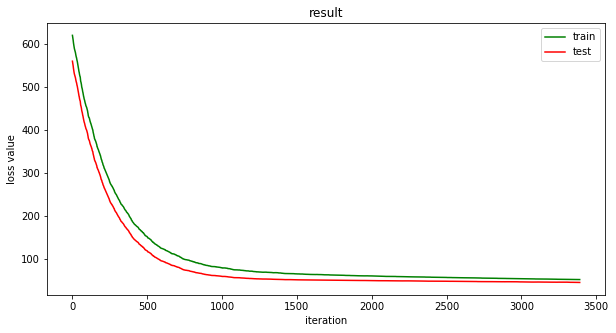

In [7]:
plt.figure(figsize=[10,5])
plt.title('result')
plt.plot(figure_x, loss_train, c='g', label='train')
plt.plot(figure_x, loss_test, c='r', label='test')
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.legend()
plt.show()